In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from pandas_datareader import wb
import matplotlib.patches as mpatches # для легенды

In [2]:
countries = wb.get_countries()
df = wb.download(indicator="SP.DYN.LE00.IN", country=countries['iso2c'], start='1980', end='2020')
df.reset_index(inplace=True)
df.rename(columns={'SP.DYN.LE00.IN':'lifespan'}, inplace=True)
df = df.pivot(index='country', columns='year', values='lifespan')
df.dropna(how='all', axis=1, inplace=True)
df.dropna(how='all', axis=0, inplace=True)
df.dropna(how='any', axis=0, inplace=True)
df['Mean'] = df.mean(axis=1)

/opt/python/envs/default/lib/python3.8/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: 1A, 1W, 4E, 6F, 6N, 6X, 7E, 8S, A4, A5, A9, B1, B2, B3, B4, B6, B7, B8, C4, C5, C6, C7, C8, C9, D2, D3, D4, D5, D6, D7, D8, D9, EU, F1, F6, JG, M1, M2, N6, OE, R6, S1, S2, S3, S4, T2, T3, T4, T5, T6, T7, V1, V2, V3, V4, XC, XD, XE, XF, XG, XH, XI, XJ, XK, XL, XM, XN, XO, XP, XQ, XT, XU, XY, Z4, Z7, ZB, ZF, ZG, ZH, ZI, ZJ, ZQ, ZT
  warnings.warn(


In [4]:
df.head()

year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Mean
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,43.244,43.923,44.617,45.324,46.040,46.761,47.486,48.211,48.930,49.640,...,61.028,61.553,62.054,62.525,62.966,63.377,63.763,64.130,64.486,54.898359
Albania,70.208,70.416,70.635,70.876,71.134,71.388,71.605,71.760,71.843,71.860,...,76.562,76.914,77.252,77.554,77.813,78.025,78.194,78.333,78.458,73.989103
Algeria,58.198,59.519,60.813,62.029,63.130,64.087,64.884,65.545,66.097,66.554,...,74.938,75.199,75.436,75.661,75.878,76.090,76.298,76.499,76.693,69.888513
Angola,44.178,44.404,44.611,44.799,44.966,45.107,45.213,45.283,45.317,45.324,...,55.350,56.330,57.236,58.054,58.776,59.398,59.925,60.379,60.782,49.477872
Antigua and Barbuda,68.482,68.818,69.156,69.491,69.820,70.137,70.440,70.728,71.004,71.267,...,75.823,75.956,76.087,76.218,76.349,76.483,76.617,76.752,76.885,73.369179


In [5]:
years = list(map(str, range(1980, 2019)))
df_t = df[years].transpose()
df_t.head()

country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Arab World,Argentina,Armenia,Aruba,Australia,...,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),World,"Yemen, Rep.",Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1980,43.244,70.208,58.198,44.178,68.482,58.345023,69.496,70.937,72.293,74.333659,...,70.256,64.637,59.961,68.542,67.542,71.700122,62.841670,48.532,52.802,59.731
1981,43.923,70.416,59.519,44.404,68.818,58.977359,69.777,70.910,72.538,74.663415,...,70.536,64.914,60.528,68.795,67.942,71.930707,63.182505,49.778,52.863,60.203
1982,44.617,70.635,60.813,44.611,69.156,59.635997,70.033,70.776,72.751,74.904878,...,70.814,65.206,61.087,69.038,68.203,72.166244,63.508917,50.981,52.905,60.650
1983,45.324,70.876,62.029,44.799,69.491,60.316277,70.262,70.519,72.929,75.146341,...,71.085,65.504,61.632,69.272,68.439,72.410244,63.757021,52.117,52.915,61.025
1984,46.040,71.134,63.130,44.966,69.820,61.003761,70.466,70.150,73.071,75.387805,...,71.343,65.796,62.158,69.497,68.688,72.662220,64.021545,53.170,52.870,61.280


In [6]:
J = 'Japan'
R = 'Rwanda'

norm_j = (df_t[J] - df_t[J].min())/(df_t[J].max() - df_t[J].min())
norm_r = (df_t[R] - df_t[R].min())/(df_t[R].max() - df_t[R].min())

In [7]:
df_t.reset_index(inplace=True)
df_t['year'] = df_t['year'].astype(int)

In [8]:
ax0 = df_t.plot(kind='scatter', 
            x = 'year', 
            y = 'Japan', 
            figsize=(24, 8), 
            alpha=0.75, 
            color='g', 
            xlim=(1975, 2025), 
            s=norm_j*1500)

df_t.plot(kind='scatter', 
            x = 'year', 
            y = 'Rwanda', 
            figsize=(24, 8), 
            alpha=0.75, 
            color='violet', 
            xlim=(1975, 2025), 
            s=norm_r*1500, 
            ax=ax0)
ax0.legend(['Japan', 'Rwanda'], loc='upper left')
ax0.set_ylabel('Количество лет жизни')

Text(0, 0.5, 'Количество лет жизни')

In [9]:
fig = plt.figure()
ax0 = fig.add_subplot(1, 2, 1) # fig.add_subplot(121) одна строка, две колонки, левая часть
ax1 = fig.add_subplot(1, 2, 2)

df_t_sp = df[years].head().transpose()

df_t_sp.plot(kind='box', figsize=(15, 6), ax=ax0)
ax0.set_title('Box plot')
ax0.set_ylabel('Средняя продолжительность жизни')
df_t_sp.plot(figsize=(15, 6), ax=ax1)
ax1.set_title('Line plot')
ax1.set_ylabel('Средняя продолжительность жизни')

Text(0, 0.5, 'Средняя продолжительность жизни')

In [10]:
# Задача
# Построить три графика (вида box plot) в одной линии с помощью subplot для страны с худшей средней продолжительностью жизни за 3 десятилетия: 80е,90е,00е

In [8]:
sorted_values = df.sort_values(by='Mean')
sorted_values.head(1)

year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Mean
country,,,,,,,,,,,,,,,,,,,,,
Sierra Leone,40.194,40.386,40.504,40.545,40.506,40.377,40.147,39.827,39.439,39.009,...,50.234,51.018,51.731,52.372,52.941,53.444,53.895,54.309,54.696,43.54685


In [9]:
df_wp = pd.concat([sorted_values.head(1), sorted_values.tail(1), sorted_values.sample(1)])
df_wp

year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Mean
country,,,,,,,,,,,,,,,,,,,,,
Sierra Leone,40.194000,40.38600,40.504000,40.545000,40.506000,40.377000,40.147000,39.827000,39.439000,39.009000,...,50.23400,51.018000,51.731000,52.372000,52.941000,53.444000,53.895000,54.309000,54.696000,43.546850
Japan,76.091707,76.41439,76.922927,76.961463,77.365366,77.650488,78.064634,78.483659,78.399268,78.818049,...,82.59122,83.096098,83.331951,83.587805,83.793902,83.984878,84.099756,84.210976,84.356341,80.712317
Brazil,62.630000,62.97600,63.326000,63.680000,64.039000,64.406000,64.782000,65.165000,65.553000,65.947000,...,73.92100,74.209000,74.483000,74.745000,74.994000,75.230000,75.456000,75.672000,75.881000,69.720125


In [10]:
mean_values_total = sum(df_wp['Mean'])
cat_propor = [val / mean_values_total for val in df_wp['Mean']]
for i, prop in enumerate(cat_propor):
    print("{} : {}".format(df_wp.index.values[i], prop))

Sierra Leone : 0.22449226169757205
Japan : 0.4160872854548068
Brazil : 0.3594204528476212


In [4]:
width, height = 40, 10
total_num = width*height

In [11]:
tiles_per_cat = [round(prop * total_num) for prop in cat_propor]
for i, prop in enumerate(tiles_per_cat):
    print("{} : {}".format(df_wp.index.values[i], prop))

Sierra Leone : 90
Japan : 166
Brazil : 144


In [12]:
waffle_chart = np.zeros((height, width))
cat_index, tile_index = 0, 0

for col in range(width):
    for row in range(height):
        tile_index += 1
        if tile_index > sum(tiles_per_cat[:cat_index]):
            cat_index += 1
        waffle_chart[row, col] = cat_index
waffle_chart       

<Figure size 432x288 with 0 Axes>

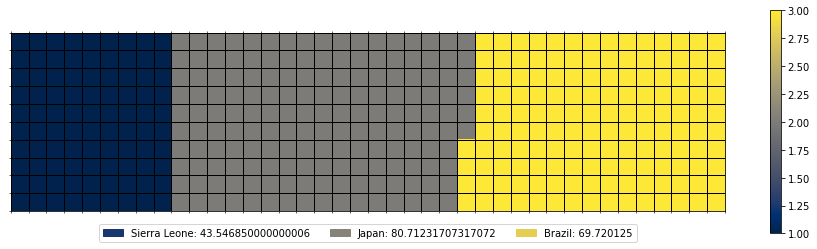

In [13]:
fig = plt.figure()
colormap = plt.cm.cividis
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
# Получение текущих осей, если их нет, то они создаются.
ax = plt.gca() 

# set minor ticks
ax.set_xticks(np.arange(-0.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-0.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='black', linestyle='-', linewidth=1)

plt.xticks([])
plt.yticks([])

legends = []

values_cum_sum = np.cumsum(df_wp['Mean'])
total = values_cum_sum[-1]

for index, country in enumerate(df_wp.index.values):
    label = '{}: {}'.format(country, df_wp['Mean'][index])
    colorm = colormap(values_cum_sum[index]/total-0.1)
    legends.append(mpatches.Patch(color = colorm, label=label))

plt.legend(handles=legends, 
            loc='lower center', 
            ncol=len(df_wp.index.values), 
            bbox_to_anchor=(0, -0.2, 1, 0.5)) # x, y, (координаты нижнего левого угла) width, height


In [34]:
df_wp['Mean']

country
Sierra Leone    43.260974
Japan           80.618881
Suriname        68.487462
Name: Mean, dtype: float64

In [35]:
arr = np.array([1, 2, 3])
np.cumsum(arr)

array([1, 3, 6])

In [40]:
values_cum_sum = np.cumsum(df_wp['Mean'])
total = values_cum_sum[-1]
print(values_cum_sum)
total

country
Sierra Leone     43.260974
Japan           123.879855
Suriname        192.367316
Name: Mean, dtype: float64


192.3673164477799